# Training Expert - DDPG

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

from algorithms.ddpg import DDPGTrainer
from utils.normalize_env import make_normalized_env

## Pendulum-v1

Description:
- The inverted pendulum swingup problem is a classic challenge in control theory.
- It consists of a pendulum attached at one end to a fixed point, with the other end free to move.

\
Objective: The goal is to swing the pendulum from a random position to an upright position, where its center of gravity is directly above the fixed point.

\
Observations

Num | Observation | Min | Max
---|---|---|---
0 | x = cos(theta) | -1.0 | 1.0
1 | y = sin(angle) | -1.0 | 1.0
2 | Angular Velocity |-8.0 | 8.0

\
Actions:
Num | Action | Min | Max
--- | --- | --- | ---
0 | Torque | -2.0 | 2.0

\
The reward function is defined as:

r = -(θ^2 + 0.1 * θ_dt^2 + 0.001 * torque^2)

where θ is the pendulum’s angle normalized between [-π, π] (with 0 being in the upright position). 

Based on the above equation, 
- The minimum reward that can be obtained is -(π^2 + 0.1 * 8^2 + 0.001 * 2^2) = -16.2736044.
- The maximum reward is 0, indicating the pendulum is upright with zero velocity and no torque applied.


Environment :  Pendulum-v1

Observation Space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

Action Space:  Box(-2.0, 2.0, (1,), float32)

Initial State:  (array([ 0.51494044, -0.85722595,  0.80125684], dtype=float32), {})

A step in the env: (array([ 0.51803863, -0.8553572 ,  0.07236307], dtype=float32), -1.1252375398117587, False, False, {})


Rendered Environment: 


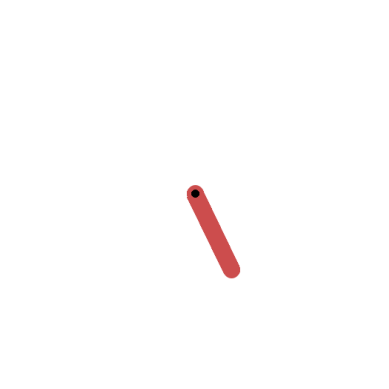

In [2]:
env = gym.make('Pendulum-v1', g=9.81, render_mode='rgb_array')

env = make_normalized_env(env)

print('\nEnvironment : ', env.unwrapped.spec.id)
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the env:', env.step(env.action_space.sample()))

print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render())
env.close()
plt.show()

# DDPG training

### Initialization:
- Initialize the environment, agent, and hyperparameters.
- Initialize actor and critic networks along with their target networks.
- Initialize replay buffer and OUNoise.

### Training Loop:
- Loop through a number of episodes.
- Reset the environment and noise process.
- Initialize the episode score to zero.
- For each step in the episode:
  - Select an action using the actor network with noise.
  - Execute the action and observe the next state, reward, and done flag.
  - Store the experience in the replay buffer.
  - Sample a batch of experiences from the replay buffer.
  - Update the critic and actor networks using the sampled experiences.
  - Update the target networks using soft update.
  - Update the current state to the next state.
  - Add the reward to the episode score.
  - If the episode is done, exit the loop.

In [3]:
expert = DDPGTrainer(env, agent_name='Expert', gamma=0.99, tau=0.001, alpha=0.0001, beta=0.001)

Training agent using DDPG..:  10%|█          | 100/1000 [01:37<15:21,  1.02s/it]

Episode 100	Average Score: -1239.7380370496965


Training agent using DDPG..:  20%|██▏        | 200/1000 [03:14<12:57,  1.03it/s]

Episode 200	Average Score: -560.7752056227542


Training agent using DDPG..:  30%|███▎       | 300/1000 [04:54<11:18,  1.03it/s]

Episode 300	Average Score: -537.2844227837452


Training agent using DDPG..:  40%|████▍      | 400/1000 [06:36<11:01,  1.10s/it]

Episode 400	Average Score: -517.1723404262885


Training agent using DDPG..:  50%|█████▌     | 500/1000 [08:18<08:30,  1.02s/it]

Episode 500	Average Score: -561.5871962831854


Training agent using DDPG..:  60%|██████▌    | 600/1000 [10:00<06:56,  1.04s/it]

Episode 600	Average Score: -587.1424442743139


Training agent using DDPG..:  70%|███████▋   | 700/1000 [11:44<05:26,  1.09s/it]

Episode 700	Average Score: -614.8249877110438


Training agent using DDPG..:  80%|████████▊  | 800/1000 [13:29<03:24,  1.02s/it]

Episode 800	Average Score: -739.9103608518844


Training agent using DDPG..:  90%|█████████▉ | 900/1000 [15:14<01:41,  1.02s/it]

Episode 900	Average Score: -726.0930098740613


Training agent using DDPG..: 100%|██████████| 1000/1000 [17:00<00:00,  1.02s/it]

Episode 1000	Average Score: -668.7114011685558


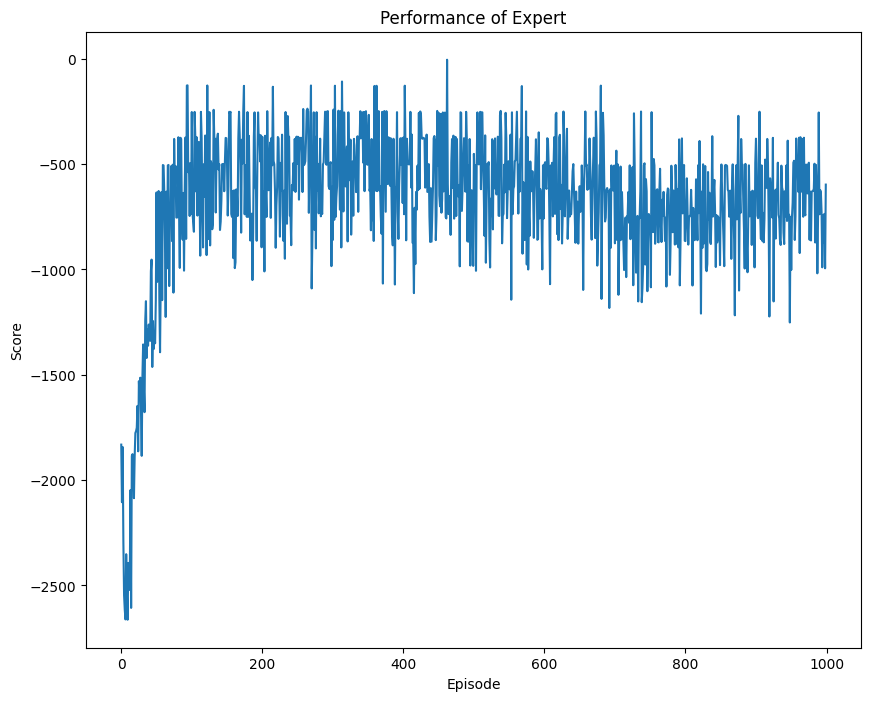

In [4]:
expert_scores, expert_avg_scores = expert.ddpg_train(n_episodes=1000)

In [3]:
expert = DDPGTrainer(env, agent_name='Expert', model_load_path='./models/Expert')

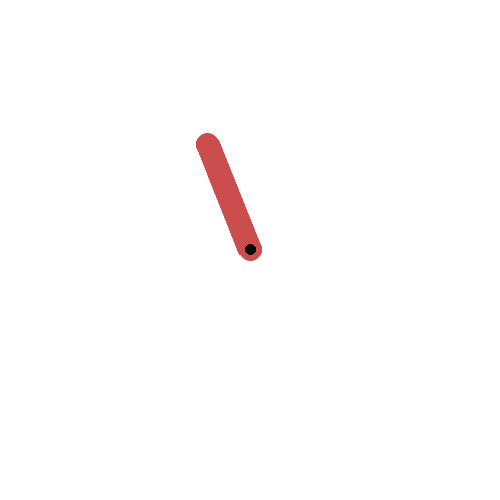

Expert Reward:  -128.2008751742598


In [7]:
expert_reward = expert.test_model(render_save_path='./results/ddpg_expert_performance')
print('Expert Reward: ', expert_reward)